<a href="https://colab.research.google.com/github/karineha1/MiniProject-1-GR83/blob/main/Task_1_%26_2_Mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1

## 1.1 Loading the data

In [108]:
# Load the dataset into Python using Pandas.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/day.csv')
display(df.head()) # Display the first 5 rows of df
df_original = df.copy() # Copy of the original df for safety

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [109]:
# Inspect the dataset structure
print(f"Number of samples: {df.shape[0]}")
print(f"\nNumber of features: {df.shape[1]}")
print("\nFeature names:",df.columns.tolist())
print("\nDataFrame info:")
df.info()

Number of samples: 731

Number of features: 16

Feature names: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int

## 1.2 Data cleaning and preprocessing


In [110]:
# Identify missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nMedian of nulls per column:")
print(df.isnull().median())
print("\nMean of nulls per column:")
print(df.isnull().mean())

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Median of nulls per column:
instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Mean of nulls per column:
instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [111]:
# Drop identifier feature: instant
if 'instant' in df.columns:
    df.drop('instant', axis=1, inplace=True)
    print("instant dropped")
else:
  print("instant not in df.columns")

# Drop irrelevant features: casual, registered, dteday
if 'casual' in df.columns:
    df.drop('casual', axis=1, inplace=True)
    print("casual dropped")
else:
  print("casual not in df.columns")

if 'registered' in df.columns:
    df.drop('registered', axis=1, inplace=True)
    print("registered dropped")
else:
  print("registered not in df.columns")

if 'dteday' in df.columns:
    df.drop('dteday', axis=1, inplace=True)
    print("dteday dropped")
else:
  print("dteday not in df.columns")

print("\ndf info:")
df.info()

instant dropped
casual dropped
registered dropped
dteday dropped

df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [112]:
# Scale continuous features
cont_features = ['temp', 'atemp', 'hum', 'windspeed']
df_scaled = df.copy() # New df to perform scaling
for col in cont_features:
    df_scaled[col] = (df[col] - df[col].mean()) / df[col].std()

In [113]:
# Apply one-hot encoding on categorical features
cat_features = ['season', 'mnth', 'weekday', 'weathersit']
df_encoded = pd.get_dummies(df_scaled, columns=cat_features, drop_first=True)

print("DataFrame head after one-hot encoding:\n")
df_encoded.info()

DataFrame head after one-hot encoding:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   cnt           731 non-null    int64  
 8   season_2      731 non-null    bool   
 9   season_3      731 non-null    bool   
 10  season_4      731 non-null    bool   
 11  mnth_2        731 non-null    bool   
 12  mnth_3        731 non-null    bool   
 13  mnth_4        731 non-null    bool   
 14  mnth_5        731 non-null    bool   
 15  mnth_6        731 non-null    bool   
 16  mnth_7        731 non-null    bool   
 17  mnth_8        731 non-null    boo

## 1.3 Data visualization and exploratory analysis

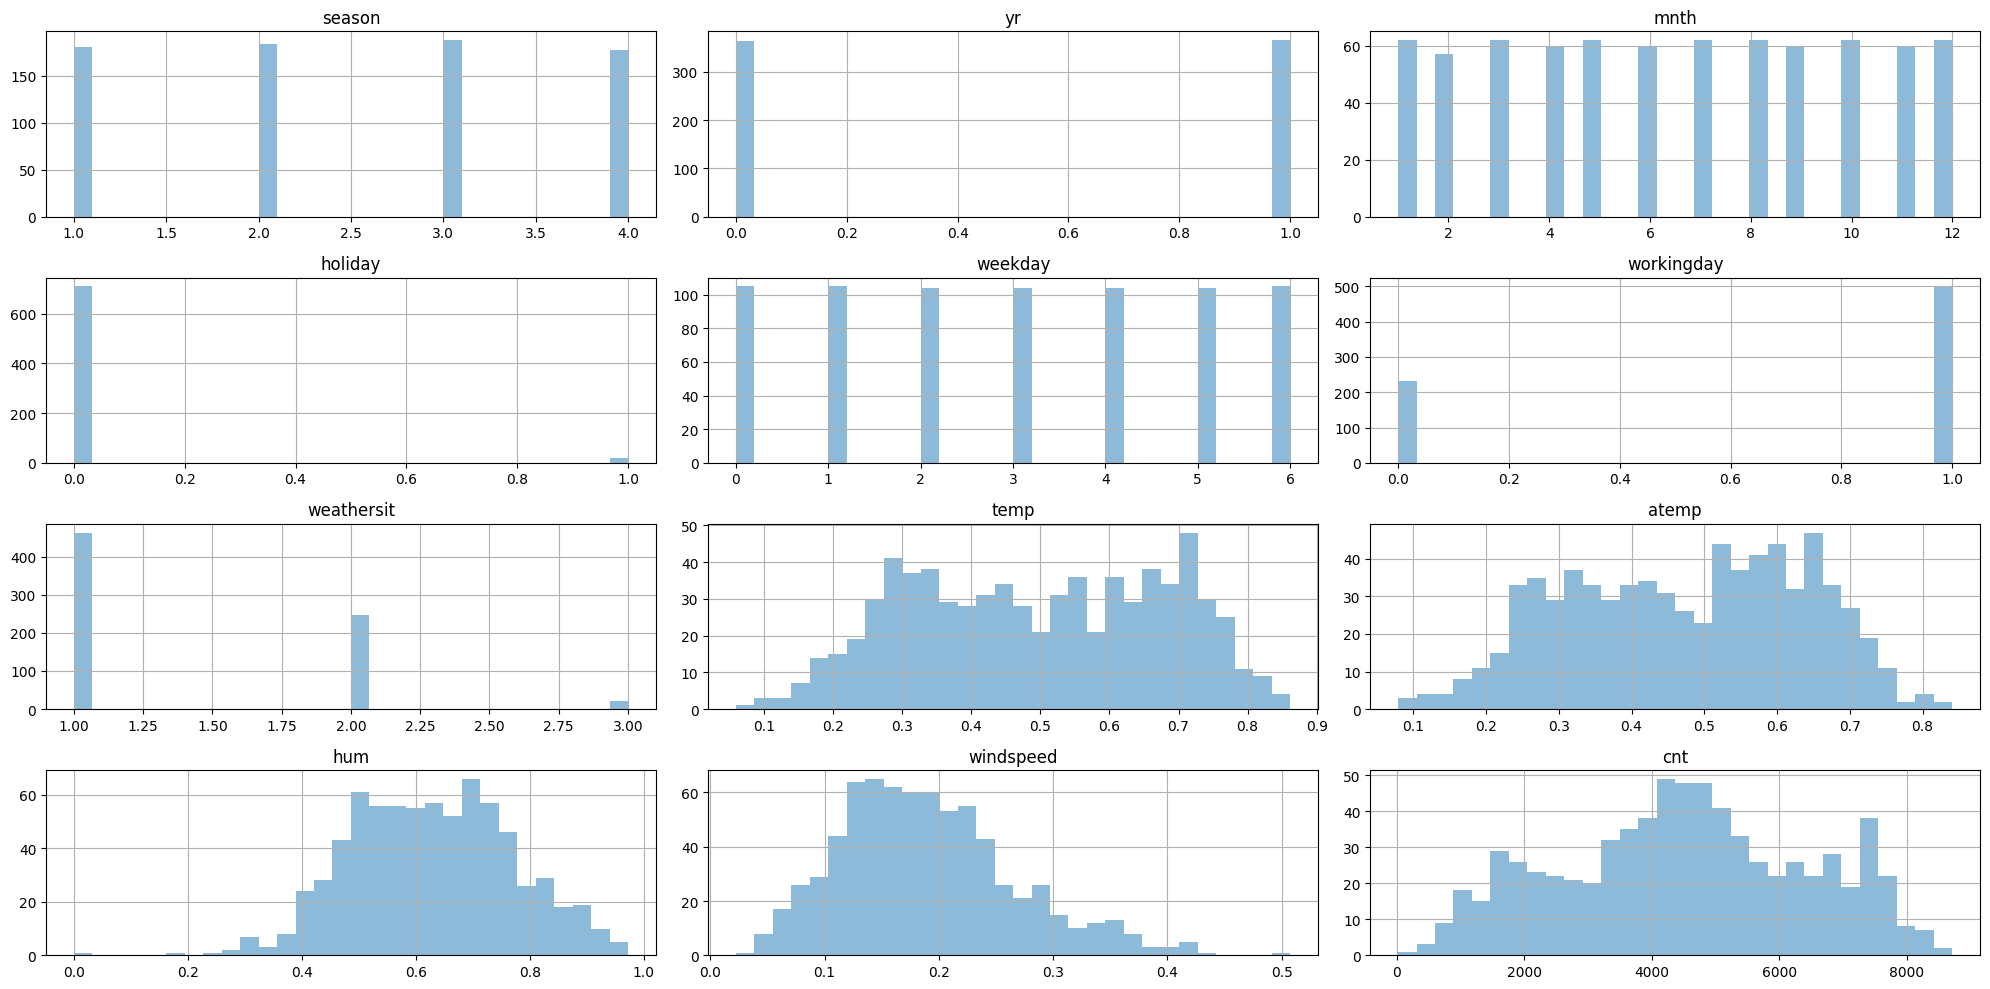

In [114]:
# Histograms for all columns
df.hist(alpha=0.5, figsize=(20, 10), bins = 30)
plt.tight_layout()
plt.show()

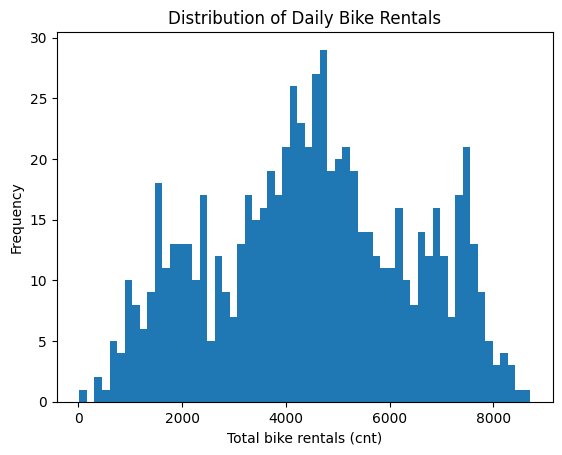

In [115]:
# Histogram of the target variable cnt
plt.figure()
plt.hist(df['cnt'], bins=60)
plt.xlabel('Total bike rentals (cnt)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Bike Rentals')
plt.show()

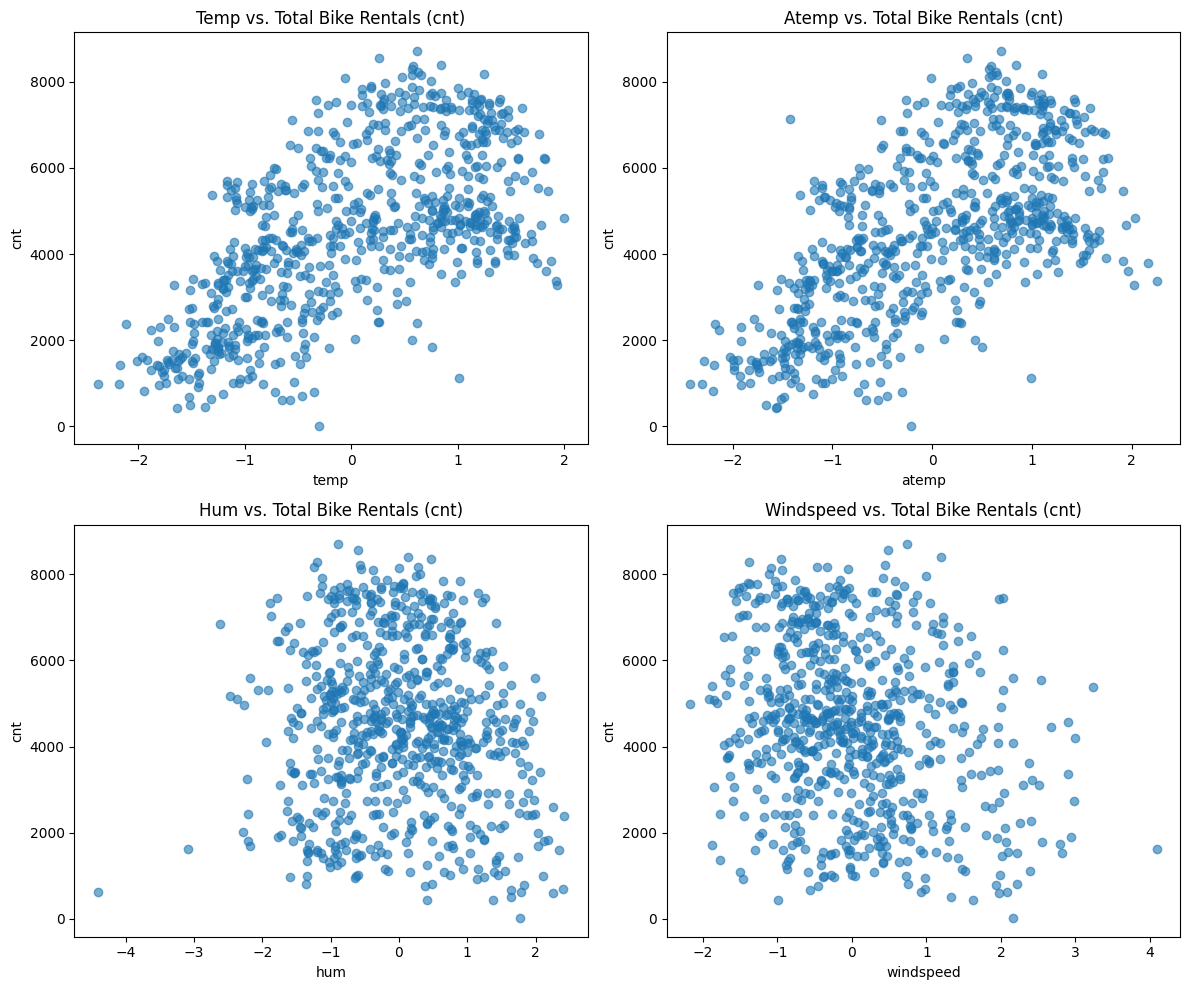

In [116]:
# Scatter Plots of Continuous Features vs. Target Variable `cnt`
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(cont_features):
    axes[i].scatter(df_encoded[feature], df_encoded['cnt'], alpha=0.6)
    axes[i].set_title(f'{feature.capitalize()} vs. Total Bike Rentals (cnt)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('cnt')

plt.tight_layout()
plt.show()

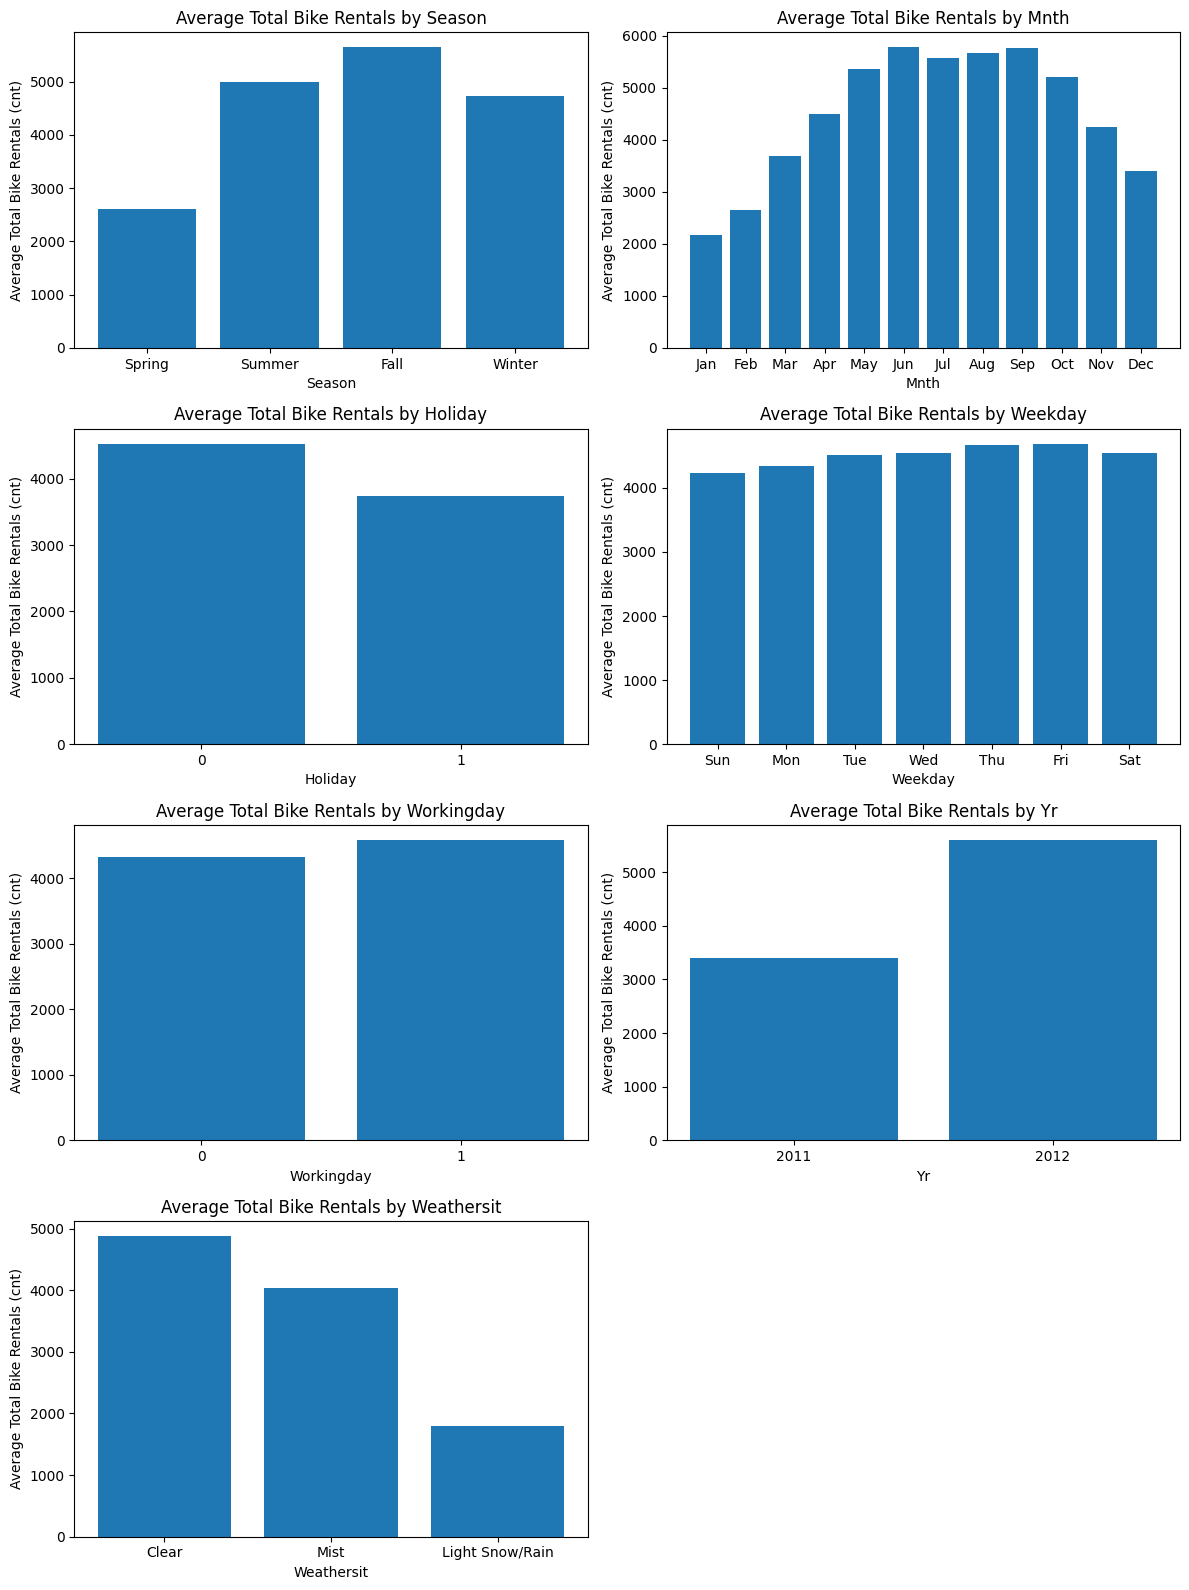

In [117]:
# Bar Plots of Average Total Bike Rentals by Categorical Features
all_cat_features = ['season','mnth', 'holiday', 'weekday', 'workingday', 'yr', 'weathersit']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 4 * 4))
axes = axes.flatten()

for i, feature in enumerate(all_cat_features):
    avg_cnt_per_category = df.groupby(feature)['cnt'].mean().reset_index()

    # Handle feature names for better readability
    if feature == 'season':
        season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
        avg_cnt_per_category[feature] = avg_cnt_per_category[feature].map(season_names)
    elif feature == 'mnth':
        month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                       7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        avg_cnt_per_category[feature] = avg_cnt_per_category[feature].map(month_names)
    elif feature == 'weekday':
        day_names = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
        avg_cnt_per_category[feature] = avg_cnt_per_category[feature].map(day_names)
    elif feature == 'weathersit':
        weather_names = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain'}
        avg_cnt_per_category[feature] = avg_cnt_per_category[feature].map(weather_names)
    elif feature == 'yr':
        year_names = {0: '2011', 1: '2012'}
        avg_cnt_per_category[feature] = avg_cnt_per_category[feature].map(year_names)

    axes[i].bar(x=avg_cnt_per_category[feature].astype(str), height=avg_cnt_per_category['cnt'])
    axes[i].set_title(f'Average Total Bike Rentals by {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Average Total Bike Rentals (cnt)')

for j in range(7, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# TASK 2

## 2.1 Model implementation

In [118]:
import numpy as np

class LinearRegression:

  """ ------------------------------------------------------------------
  Initializes Linear Regression Model.
  Parameters:
  add_bias: if True, adds an intercept term (bias/w_0) to the model
  """
  def __init__(self, add_bias = True):
    self.add_bias = add_bias
    self.w = None

  """ ------------------------------------------------------------------
  Fit the linear regression model by computing optimal weights.
  Parameters:
  x: input features, shape (N,) or (N, D) where N = samples, D = features
  y: target values, shape (N,)
  """
  def fit (self, x, y):
    x = np.asarray(x, dtype = np.float32)
    y = np.asarray(y, dtype = np.float32)

    if x.ndim == 1:
      x = x[:, None]

    N = x.shape[0]

    if self.add_bias:
      x = np.column_stack([x, np.ones(N)])

    # Solve the least squares value
    self.w = np.linalg.lstsq(x, y, rcond=None)[0]
    return self

  """ ------------------------------------------------------------------
  Predict target values for input x using learned weights.
  Parameters:
  x: input features, shape(N,) or (N, D) where N is the number of samples and
     D is the number of features
  Returns:
  y_pred: predicted target values, shape (N,)
  """
  def predict (self, x):
    if self.add_bias:
      x = np.column_stack([x, np.ones(x.shape[0])])

    # Matrix multiplication: x@w computes predictions
    # If x is (N, D+1) and w is (D+1,), the result is (N,)
    yh = x@self.w

    return yh

  """ ------------------------------------------------------------------
  Calculate mean squared error for the given data
  """
  def score (self, y, yh):
    mse = np.mean((y - yh)**2)
    return mse


## 2.2 Train / test split

In [119]:
np.random.seed(0)

# Create a copy of df_encoded to avoid modifying the original and for adding 'traintest' column
df_model = df_encoded.copy()
df_model['traintest'] = np.random.rand(len(df_model))
train = df_model[df_model['traintest'] > 0.5].copy()
test = df_model[df_model['traintest'] <= 0.5].copy()

## 2.3 Evaluation metric

In [120]:
train_x = train.drop(['cnt', 'traintest'], axis = 1)
train_y = train['cnt']

test_x = test.drop(['cnt', 'traintest'], axis = 1)
test_y = test['cnt']

model = LinearRegression(add_bias = True)
model.fit(train_x, train_y)
train_yh = model.predict(train_x)
test_yh = model.predict(test_x)

train_mse = model.score(train_y, train_yh)
test_mse = model.score(test_y, test_yh)

print("Train MSE: ", train_mse)
print("Test MSE: ", test_mse)

Train MSE:  603849.5412843217
Test MSE:  585021.7127822274
